# Introduction

The context is an hydroponic system developed by the company myfood.
[MyFood](https://myfood.eu/fr/)
![title](images/logoMyFoodHeaderCopyright.png)

This project is a contribution to myfood after a discussion with Michael Gandecki cofunder of the company. <br>The objective is to find a solution to to predict filter clogging. Filter are used to protect the pump used in the hydroponic circuit. Here after you can discover the shema bloc describing the circuit used to test the pump.

![title](images/Test_hydroponic_Circuit.png)

The pump used is a jbao jecod dcs 4000 that could provide a flow of 4000 l/hour when there is no elevation. 
<br>
The engine composing the pump is based on a brushless direct current. The rotor is composed by a magnet and the stator is driven by an electronic circuit that allow to control the velocity of the pump. You can discover the priciple of this motor here : [Brushless DC motor](../../Documents/brushless DC Motor/Brushless DC Motor Fundamentals.pdf).<br>In the circuit we measure the current consumed by the pump at the entry of the electronic controlling the pump.

In the circuit presented and to simulate the reality the water is elevated to 1.80 m.There is a drop in flow because the pump has to raise the water.<br>
The filter is simultated with a valve controled and the circuit representing the distribution of the water is simulated with a manual valve. A flow metter is used to measure the flow and the current consumed by the pump is also measured.<br>

![title](images/realcircuit.png)
<br>
This image is a zoom on the flow meter used in the circuit. The pump is also in the water to be in the same condition in the reality. [Flow meter doc](../../Documents/Flow Meter/vig-datenblatt.pdf)
![title](images/flowmeter.png)

The measure are obtained via the labjack U3 module and an electronic circuit developed for the project composed by operational amplifier is used to adapt the signal to the entries of labjack U3 module.<br>
![title](images/labjackU3.png)
<br>
<br>
The acquistion module is writen with Ipython in a separate notebook you can fine here :  [Aquisition module](../Data Aquisition/LabjackTestPython.ipynb)
<br>
The technical guide for the labjack U3 module can be find here : [Module doc](../../Documents/LabjackU3/LabJack-U3-Datasheet-Export-20161024.pdf)
<br>
The aquisition module store the data in a csv file and the analyse of the data collected are already presented in this notebook : [Apply data storytelling](./Apply data storytelling.ipynb)
<br>
In the visual analysis we have discovered the current contains noise and needs to be cleaned. The code here after already presented will create a dataframe from the csv file and data are adjusted to represent the real physical measure.

In [8]:
import pandas as pd
import numpy as np

def load_acquisition_data(filelocation):
    format = '%Y-%m-%d %H:%M:%S,%f'
    df =pd.read_csv(filelocation, sep=';',parse_dates=True);
    times = pd.to_datetime(df.DateTime , format=format)
    df.set_index(times, inplace=True)
    df['ValveOpening'] = df['EntryLoad'] - df['EntryLoad'].shift(-1) <0
    return df

pumpdata = load_acquisition_data('..\data\PumpMeasuresFormated.csv')
pumpdata["Flow"]=(pumpdata["Flow"]/97)*360
pumpdata["PumpCurrent"] = ((pumpdata["PumpCurrent"]/4095)*2.44 +3.85)/(11.8*0.5)
pumpdata["EntryLoad"]= pumpdata["EntryLoad"]/255*100

The value measured of the current is obtained in labjack U3 via an analog to numeric converter with 12 bits precision <br>
An amplifier operational with a gain and an offset is used to convert the measure of the tension on the shunt to
a voltage varying form 0 to 2.44 volt <br>
The amplifier operational function transfert is a linear function with a gain of 11.8 and an offset of -3.85 <br>
The shunt resistor value is 0.5 ohm <br>
The formula here after transform the numeric value returned by the CAN to the intensity consumed by the pump <br> <br>
The flow meter provide 97 pulse for each litter <br>
The flow measure period is 10s <br>
The flow in l/h is obtained by (Nbpulse/97)*360


In [9]:
pumpdata.head()

,Id,Cycle,DateTime,Flow,EntryLoad,OutputLoad,PumpCurrent,PumpVelocity,ValveOpening
DateTime,,,,,,,,,
2017-04-23 14:38:39.310,0,1,"2017-04-23 14:38:39,310",360.00000,100.000000,100,1.029644,10,False
2017-04-23 14:38:52.515,1,1,"2017-04-23 14:38:52,515",352.57732,98.039216,100,1.049539,10,False
2017-04-23 14:39:05.554,2,1,"2017-04-23 14:39:05,554",356.28866,96.078431,100,1.094682,10,False
2017-04-23 14:39:18.585,3,1,"2017-04-23 14:39:18,585",363.71134,94.117647,100,1.024190,10,False
2017-04-23 14:39:31.616,4,1,"2017-04-23 14:39:31,616",363.71134,92.156863,100,1.096399,10,False


In [10]:
pumpdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2017-04-23 14:38:39.310000 to 2017-04-23 22:51:14.356000
Data columns (total 9 columns):
Id              1980 non-null int64
Cycle           1980 non-null int64
DateTime        1980 non-null object
Flow            1980 non-null float64
EntryLoad       1980 non-null float64
OutputLoad      1980 non-null int64
PumpCurrent     1980 non-null float64
PumpVelocity    1980 non-null int64
ValveOpening    1980 non-null bool
dtypes: bool(1), float64(3), int64(4), object(1)
memory usage: 141.2+ KB


In [4]:
pumpdata.describe()

,Id,Cycle,Flow,EntryLoad,OutputLoad,PumpCurrent,PumpVelocity
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,989.500000,6.000000,212.835989,49.860566,77.272727,0.920341,7.727273
std,571.721086,3.163077,80.971236,29.117532,24.902769,0.098030,1.601024
min,0.000000,1.000000,0.000000,0.000000,50.000000,0.741213,5.000000
25%,494.750000,3.000000,152.164948,24.901961,50.000000,0.842810,6.000000
50%,989.500000,6.000000,233.814433,49.803922,100.000000,0.928047,8.000000
75%,1484.250000,9.000000,267.216495,74.705882,100.000000,0.997983,9.000000
max,1979.000000,11.000000,382.268041,100.000000,100.000000,1.101348,10.000000


With the statsmodel library we will clean the noise contained in the current of the pump measured and we keep the trend.<br>
Current Filtered represents the trend of the current obtained by the seasonal analysis<br>
<br>
Each cycle is composed with two phases. A closing phase where the step to control the valve is equal to 5 and an opening phase where the step is equal to 2.<br> The valve is controlled by a value from 0 to 255.<br>
- For the closing phase we have 255/5 + 1 = 52 measures
- For the opening phase we have int(255/2)+1  = 128 measures

Each cycle corresponds to 180 measures. We have 11 cycles. A total of 1980 measures corresponding to the size of the dataset.<br><br>
For the frequence we will use the number of measures corresponding to the closing phase. This frequence is the most rapid of the two phases.
<br>
For this frequence, we can observe in the seasonal part of the graphic 1980/52= 38 pics. The duration of the closing phase will used to filter the trend.<br> If we will do this filtering with electronical component, this period corresponds to the time constant provided by a low pass filter<br> <b>The current trend will be used as a new feature in the dataset.</b>

C:\Anaconda343\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


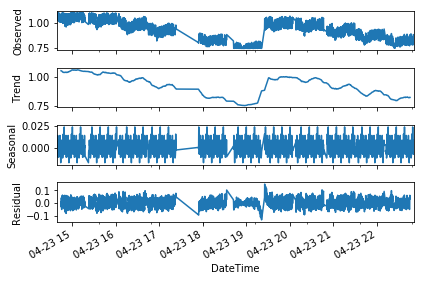

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm 

decompfreq = 52
res = sm.tsa.seasonal_decompose(pumpdata.PumpCurrent.interpolate(),freq=decompfreq, model='additive')
res.plot()
pumpdata["CurrentFiltered"] = res.trend

In [12]:
corrMatrix = pumpdata.corr()
corrMatrix["Flow"].sort_values(ascending=False)

Flow               1.000000
PumpCurrent        0.528724
CurrentFiltered    0.522893
EntryLoad          0.469189
OutputLoad         0.426974
PumpVelocity       0.420789
ValveOpening      -0.135560
Id                -0.601973
Cycle             -0.616372
Name: Flow, dtype: float64

The variation of the flow is explained by :
- the variation of the current 0.52
- the entryload 0.47
- the outputload 0.42
- the pump velocity 0.42

We can say with these values, the flow could be explained by the current measured. We don't obtain a better correlation coeficient with the current filtered.


In [23]:
corrMatrix = pumpdata.corr()
corrMatrix["CurrentFiltered"].sort_values(ascending=False)

CurrentFiltered    1.000000
PumpVelocity       0.918880
PumpCurrent        0.909811
Flow               0.522893
EntryLoad          0.097973
OutputLoad         0.080320
ValveOpening       0.022181
Id                -0.543076
Cycle             -0.548452
Name: CurrentFiltered, dtype: float64

The variation of the current is explained by :
- the variation of the pump velocity 0.92
- the flow 0.52
- the entry load 0.09
- the output load 0.08

We  can say with this values, the flow could be explained by the velocity of the pump and the flow. The entry load and the output load have a slow impact on the current variation. For the current filtered we can't observe a better correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000418CFA32E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000004187E73320>]], dtype=object)

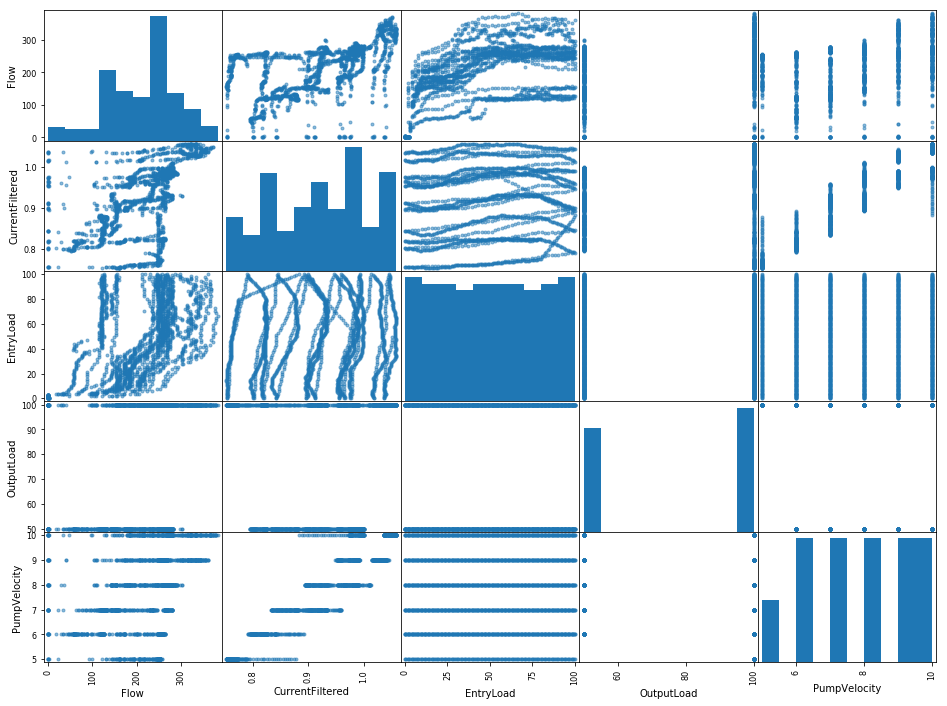

In [15]:
from pandas.tools.plotting import scatter_matrix
attributes = ["Flow","CurrentFiltered","EntryLoad","OutputLoad","PumpVelocity"]
scatter_matrix(pumpdata[attributes],figsize=(16,12))

The scatter matrix here above allow to confirm the observation done with the correlation matrix.<br>
The curve observed for the relation between entry load and flow confirm a correlation exists between these two features.<br>
The scatter plot representing the relation between entryload and pump current filterd show a curve, we can say a correlation exists between the current and the entry load<br>
A relation exists between the flow and the pump current filtered. 
- The scatter plot presenting the relation between the flow and pump velocity shows the range of flow change in function of the velocity of the pump.
- We have the same behaviour between the pump current and the velocity of the pump.

<br>
The feature engineering applied to the current allow to visualise the relation between the entry load and the current consumed by the pump.

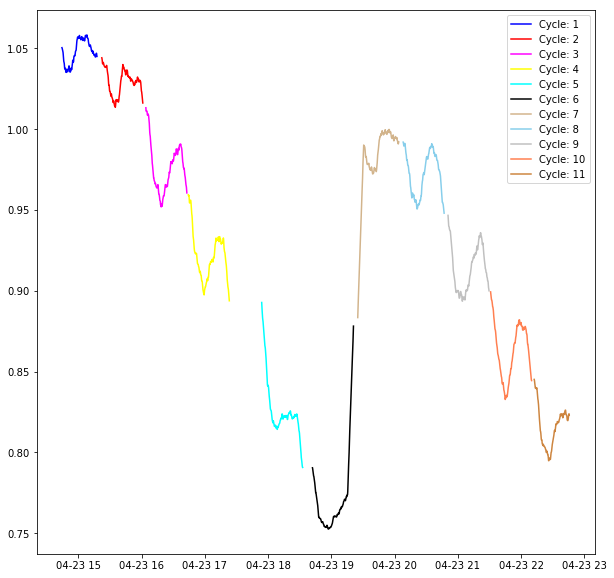

In [16]:
plt.figure(figsize=(10,10))
for cycle in range(1,12):
    colors = ['blue','red','magenta','yellow','cyan','black','tan','skyblue','silver','coral','peru']
    subset = pumpdata[pumpdata.Cycle==cycle].dropna()
    #subset = subset[subset.ValveOpening==True]
    cyclename = 'Cycle: ' + str(cycle)
    plt.plot_date(subset.DateTime, subset.CurrentFiltered,'b-', c=colors[cycle-1], label=cyclename)
plt.legend()

The graphic above shows the variation of the measure of the current filtered in function of the time. We can observe for each cycle the two phases.<br> We can see the current remains in a given range for each cycle.<br> For the cycle 7 we have changed the output load but we use the the same velocity for the cycle 1.<br> We can see influance of the output load on the value of the current.

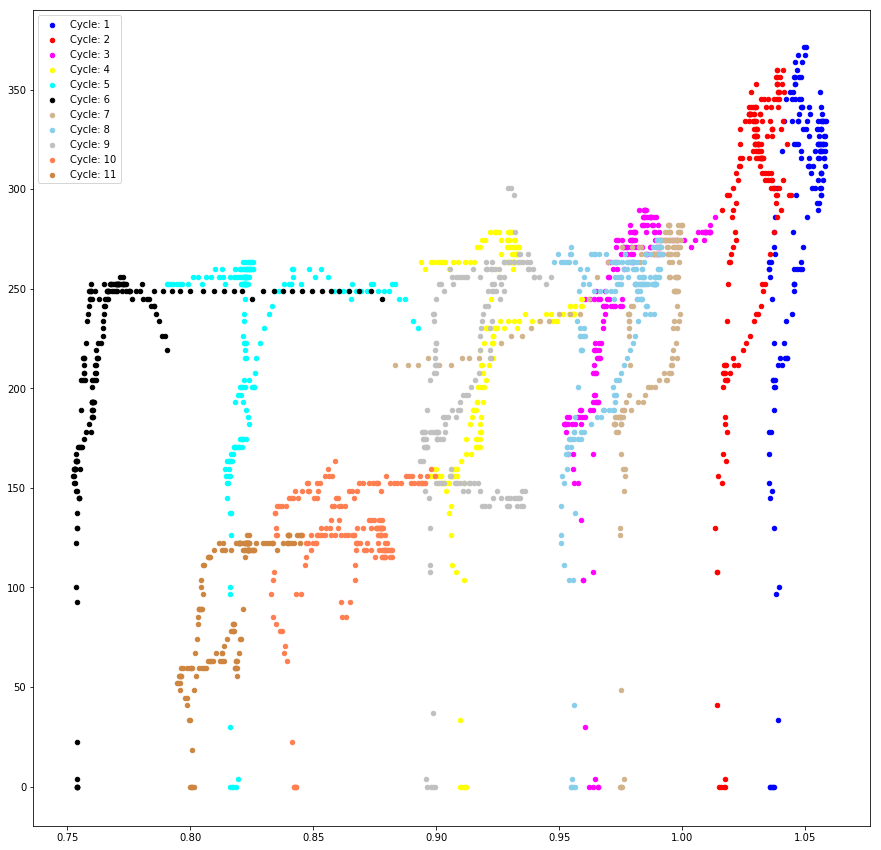

In [17]:
plt.figure(figsize=(15,15))
for cycle in range(1,12):
    colors = ['blue','red','magenta','yellow','cyan','black','tan','skyblue','silver','coral','peru']
    subset = pumpdata[pumpdata.Cycle==cycle].dropna()
    cyclename = 'Cycle: ' + str(cycle) 
    cycleColor = cycle-1
    plt.scatter(subset.CurrentFiltered, subset.Flow,s=20, c=colors[cycleColor], label=cyclename)
plt.legend()

This graphic shows the relation between the flow and the filtered current consumed by the pump.<br> Compared to the graphic we had with the non filtered current , we can see now a curve for each cycle.<br>We can see clearly the range of the current are different for each cycle and for each cycle we can observe two curves one for each phase.

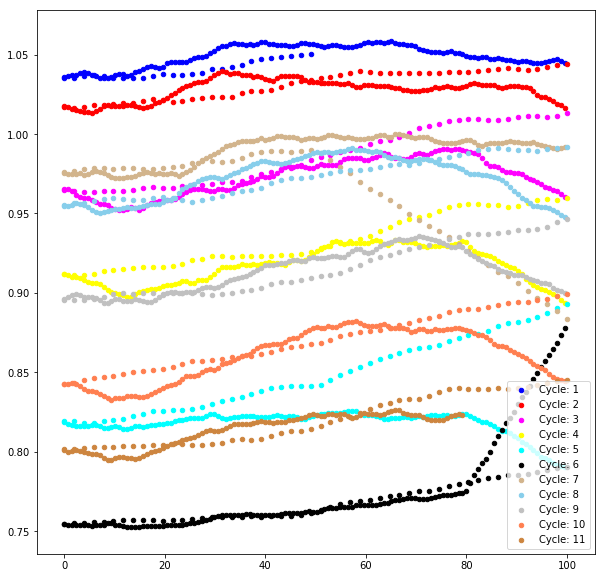

In [18]:
plt.figure(figsize=(10,10))
for cycle in range(1,12):
    colors = ['blue','red','magenta','yellow','cyan','black','tan','skyblue','silver','coral','peru']
    subset = pumpdata[pumpdata.Cycle==cycle].dropna()
    cyclename = 'Cycle: ' + str(cycle)
    plt.scatter(subset.EntryLoad, subset.CurrentFiltered, s=20, c=colors[cycle-1], label=cyclename)
plt.legend()

This graphic shows the relation between the entry load (position of the valve) and the filtered current consumed by the pump. <br>Compared to the graphic with current non filtered we observe curve for each cycle and we have two curve by cycle corresponding to each phase.<br> We can observe a range for the current for each cycle on the graphic.<br> The source of the jump observed for the value at 100% of the valve corresponds to the change of the velocity of the pump or the change of the output load.<br> <b>Important</b><br>The origin of the jump is also the filtering applied to the current using a period of time, the filter act as a sliding average applied to the current measured and explain the jump between the cycle 6 and 7 for the value 100% of the entry load. the important change comes from the change of the output load moving to 50%<br>
# Conclusion

After cleaning the current consumed by the pump we can observe clearly curve beween the current filtered and the flow or the the entry load. <br>As indicated at the begening we would predict the clogging of the filter. The clogging of the filter is represented in the experiment by the entry load value of the valve.<br> In the next chapter we will try with machine learning technics to predict how the flow and the entry load vary in function of the current measured.<br> The idea is to obtain a function receiving :
- the current consumed by the pump
- the pump velocity
- the output load

and predict the flow and the entry load corresponding to a level of clogging for the filter.